In [73]:
import tensorflow as tf

# Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


Import dataset

In [74]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [75]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Verify shapes and structure of acquired data

In [76]:
train_images.shape

(60000, 28, 28)

In [77]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Plot examples with corresponding label

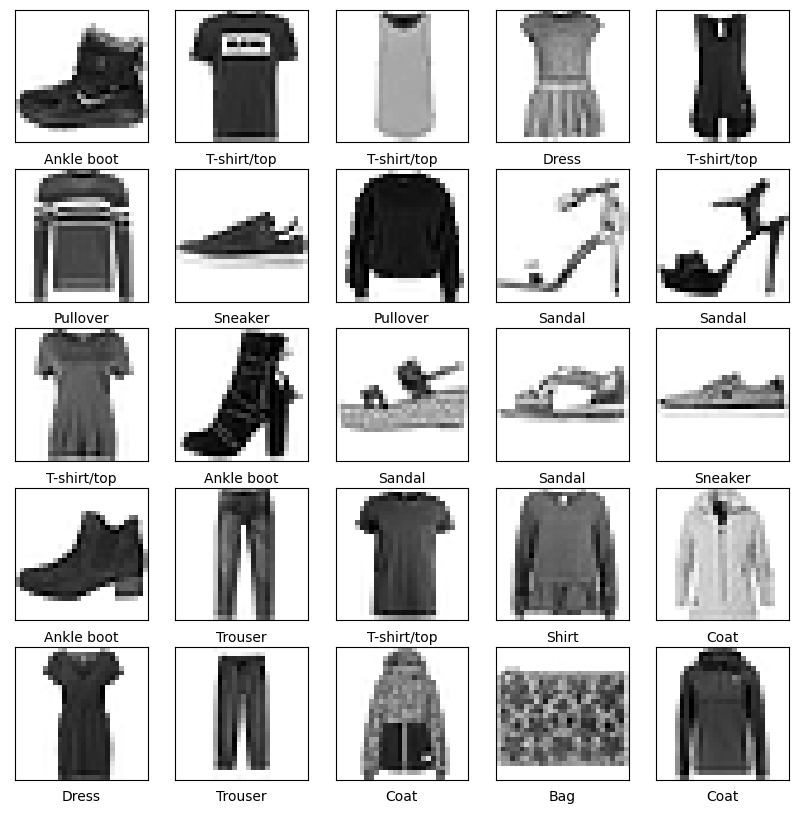

In [78]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train model on training data and keep track of emissions. Added to emissions.csv

In [81]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(output_dir='../reports', output_file='emissions.csv')
tracker.start()

model.fit(train_images, train_labels, epochs=25)
tracker.stop()

[codecarbon INFO @ 01:06:34] [setup] RAM Tracking...
[codecarbon INFO @ 01:06:34] [setup] GPU Tracking...
[codecarbon INFO @ 01:06:34] No GPU found.
[codecarbon INFO @ 01:06:34] [setup] CPU Tracking...
[codecarbon WARNING @ 01:06:34] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 01:06:34] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 01:06:34] >>> Tracker's metadata:
[codecarbon INFO @ 01:06:34]   Platform system: macOS-15.0.1-arm64-arm-64bit
[codecarbon INFO @ 01:06:34]   Python version: 3.10.4
[codecarbon INFO @ 01:06:34]   CodeCarbon version: 2.7.1
[codecarbon INFO @ 01:06:34]   Available RAM : 8.000 GB
[codecarbon INFO @ 01:06:34]   CPU count: 8
[codecarbon INFO @ 01:06:34]   CPU model: Apple M1
[codecarbon INFO @ 01:06:34]   GPU count: None
[codecarbon INFO @ 01:06:34]   GPU model: None
[codecarbon INFO @ 01:06:37] Saving emissions data to 

Epoch 1/25
1875/1875 [==============================] - 2s 893us/step - loss: 0.5018 - accuracy: 0.8248
Epoch 2/25
1875/1875 [==============================] - 1s 781us/step - loss: 0.3810 - accuracy: 0.8639
Epoch 3/25
1875/1875 [==============================] - 1s 612us/step - loss: 0.3409 - accuracy: 0.8764
Epoch 4/25
1875/1875 [==============================] - 1s 628us/step - loss: 0.3166 - accuracy: 0.8846
Epoch 5/25
1875/1875 [==============================] - 1s 605us/step - loss: 0.2958 - accuracy: 0.8913
Epoch 6/25
1875/1875 [==============================] - 1s 581us/step - loss: 0.2832 - accuracy: 0.8952
Epoch 7/25
1875/1875 [==============================] - 1s 636us/step - loss: 0.2692 - accuracy: 0.9006
Epoch 8/25
1875/1875 [==============================] - 1s 655us/step - loss: 0.2582 - accuracy: 0.9031
Epoch 9/25
1875/1875 [==============================] - 1s 663us/step - loss: 0.2487 - accuracy: 0.9078
Epoch 10/25
1875/1875 [==============================] - 1s 682u

[codecarbon INFO @ 01:06:52] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:06:52] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:06:52] 0.000033 kWh of electricity used since the beginning.


1875/1875 [==============================] - 1s 690us/step - loss: 0.2231 - accuracy: 0.9165
Epoch 13/25
1875/1875 [==============================] - 1s 640us/step - loss: 0.2175 - accuracy: 0.9188
Epoch 14/25
1875/1875 [==============================] - 1s 618us/step - loss: 0.2109 - accuracy: 0.9219
Epoch 15/25
1875/1875 [==============================] - 1s 609us/step - loss: 0.2043 - accuracy: 0.9231
Epoch 16/25
1875/1875 [==============================] - 1s 674us/step - loss: 0.2002 - accuracy: 0.9242
Epoch 17/25
1875/1875 [==============================] - 1s 656us/step - loss: 0.1944 - accuracy: 0.9272
Epoch 18/25
1875/1875 [==============================] - 1s 603us/step - loss: 0.1892 - accuracy: 0.9285
Epoch 19/25
1875/1875 [==============================] - 1s 593us/step - loss: 0.1849 - accuracy: 0.9302
Epoch 20/25
1875/1875 [==============================] - 1s 607us/step - loss: 0.1795 - accuracy: 0.9327
Epoch 21/25
1875/1875 [==============================] - 1s 682us/s

[codecarbon INFO @ 01:07:07] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:07:07] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:07:07] 0.000067 kWh of electricity used since the beginning.


1875/1875 [==============================] - 1s 640us/step - loss: 0.1602 - accuracy: 0.9394


[codecarbon INFO @ 01:07:09] Energy consumed for RAM : 0.000026 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:07:09] Energy consumed for all CPUs : 0.000043 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:07:09] 0.000069 kWh of electricity used since the beginning.


1.2062354324382888e-05

In [82]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3825 - accuracy: 0.8838 - 213ms/epoch - 681us/step

Test accuracy: 0.8838000297546387


In [83]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [84]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 351us/step


In [85]:
np.argmax(predictions[0])

9

In [86]:
test_labels[0]

9

Functions for plotting

In [87]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verification

Plot an image and corresponding prediction and real value. Blue = correct, Red = wrong prediction.

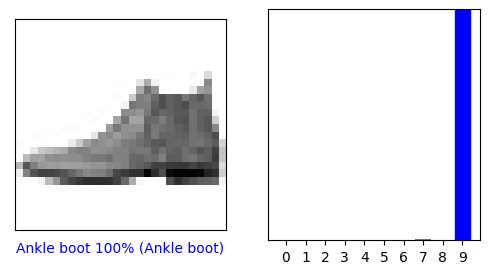

In [88]:
#Showing the first image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

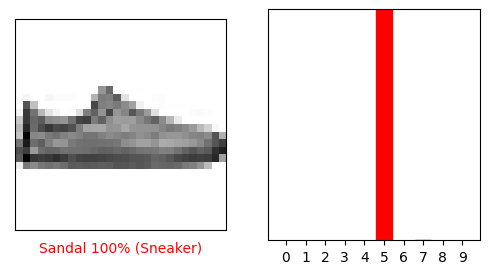

In [89]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

## Plot the first x test images
## Color correct predictions in blue and incorrect predictions in red.
The model can be wrong even tho very confident

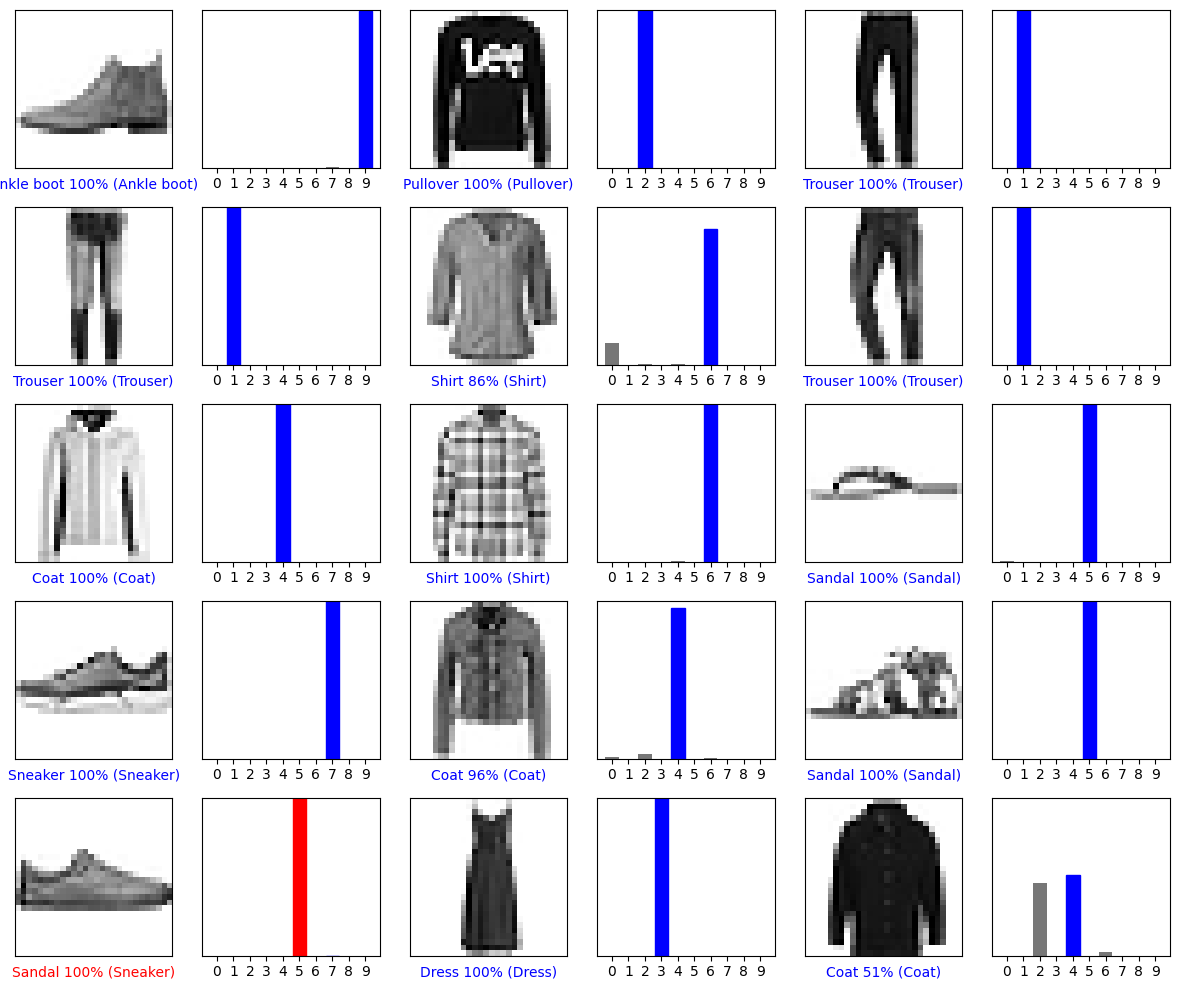

In [90]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use model for prediction

In [91]:
# Add the image to empty batch
img = test_images[1]
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


1/1 [==============================] - 0s 12ms/step


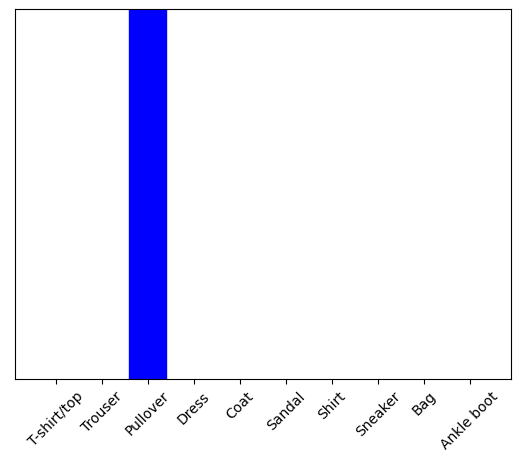

In [92]:
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [93]:
np.argmax(predictions_single[0])

2

## Summary
Lastly the model now i trained and exported. It now is possible to send an image in 28x28 format in greyscale and get a prediction between 0 and 9 representing each piece of clothing